In [26]:
import pandas as pd
import numpy as np

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure
from sklearn.metrics import accuracy_score
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd 'drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Create matrix for the network

In [0]:
# Create categorial matrix when given set is a vector (avoid errors when run multiple times)
if y_train.ndim ==1: y_train=to_categorical(y_train)
if y_test.ndim ==1: y_test=to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [6]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Flatten(),
  Dense(num_classes, activation='softmax'),
])

# model.summary()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 3ms/step - loss: 13.8657 - accuracy: 0.8055


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax'),
  ])

def train_model(model, X_train, y_train, params_fit={}):
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H-%M-%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    
    model.fit(
        X_train,
        y_train,
        batch_size = params_fit.get('batch_size', 128),
        epochs = params_fit.get('epochs',5),
        verbose = params_fit.get('verbose',1),
        validation_data = params_fit.get('validation_data',(X_train, y_train)),
        callbacks = [tensorboard_callback]
      )
    return model

In [20]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model,X_train,y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 28.7825 - accuracy: 0.7818 - val_loss: 0.2128 - val_accuracy: 0.9564
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1822 - accuracy: 0.9597 - val_loss: 0.1201 - val_accuracy: 0.9780
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1362 - accuracy: 0.9699 - val_loss: 0.0862 - val_accuracy: 0.9817
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1098 - accuracy: 0.9751 - val_loss: 0.1103 - val_accuracy: 0.9756
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.0799 - accuracy: 0.9813 - val_loss: 0.0520 - val_accuracy: 0.9879


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)
  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)


In [22]:
y_pred_prob[400]

array([1.6460370e-03, 9.9818122e-01, 2.0782112e-11, 3.9566369e-14,
       1.7273589e-04, 2.2609878e-09, 3.0738100e-27, 5.4457146e-19,
       3.6426263e-37, 1.6858790e-25, 1.8692304e-20, 4.6411472e-21,
       4.4426928e-28, 3.9889347e-24, 3.3268603e-23, 9.7413257e-16,
       2.2935450e-33, 5.1895290e-24, 6.8462418e-18, 8.9370663e-38,
       1.9861913e-27, 7.4986565e-15, 2.5600200e-26, 1.1170602e-25,
       1.9292873e-20, 1.6132438e-24, 7.6641458e-27, 5.6642413e-28,
       1.1282478e-22, 1.4442523e-21, 6.6486453e-28, 1.1153567e-18,
       1.5048432e-26, 2.3349889e-36, 0.0000000e+00, 1.3483209e-18,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       2.2462514e-33, 0.0000000e+00, 5.8579728e-35], dtype=float32)

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [25]:
labels_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [0]:
def train_and_predict(model):
  model_trained = train_model(model,X_train,y_train)
  return predict(model_trained, X_test, y_test)

In [36]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 6.1921 - accuracy: 0.3026 - val_loss: 1.3860 - val_accuracy: 0.6381
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 1.2552 - accuracy: 0.6300 - val_loss: 0.4519 - val_accuracy: 0.8959
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.6185 - accuracy: 0.8157 - val_loss: 0.2264 - val_accuracy: 0.9613
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3889 - accuracy: 0.8836 - val_loss: 0.1137 - val_accuracy: 0.9764
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2839 - accuracy: 0.9151 - val_loss: 0.0773 - val_accuracy: 0.9835


0.9090702947845805

In [37]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.0853 - accuracy: 0.5373 - val_loss: 0.2990 - val_accuracy: 0.9320
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4621 - accuracy: 0.8625 - val_loss: 0.0994 - val_accuracy: 0.9801
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2661 - accuracy: 0.9223 - val_loss: 0.0638 - val_accuracy: 0.9870
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1917 - accuracy: 0.9429 - val_loss: 0.0354 - val_accuracy: 0.9926
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1399 - accuracy: 0.9595 - val_loss: 0.0191 - val_accuracy: 0.9952


0.9655328798185941

In [38]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 3.2983 - accuracy: 0.1889 - val_loss: 1.7082 - val_accuracy: 0.4523
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 1.4358 - accuracy: 0.5363 - val_loss: 0.5473 - val_accuracy: 0.8236
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.6861 - accuracy: 0.7785 - val_loss: 0.1859 - val_accuracy: 0.9518
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3659 - accuracy: 0.8832 - val_loss: 0.1035 - val_accuracy: 0.9687
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2470 - accuracy: 0.9225 - val_loss: 0.0494 - val_accuracy: 0.9853


0.9587301587301588

In [39]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 2.4789 - accuracy: 0.3076 - val_loss: 1.0576 - val_accuracy: 0.6482
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.8776 - accuracy: 0.7168 - val_loss: 0.2315 - val_accuracy: 0.9302
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.3993 - accuracy: 0.8766 - val_loss: 0.0960 - val_accuracy: 0.9716
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2683 - accuracy: 0.9185 - val_loss: 0.0608 - val_accuracy: 0.9815
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2092 - accuracy: 0.9375 - val_loss: 0.0394 - val_accuracy: 0.9903


0.9619047619047619

# Convert RGB to grayscale

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

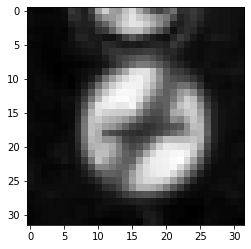

In [48]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [44]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 5s 19ms/step - loss: 2.5100 - accuracy: 0.2904 - val_loss: 0.6992 - val_accuracy: 0.7800
Epoch 2/5
272/272 [==============================] - 5s 18ms/step - loss: 0.5155 - accuracy: 0.8338 - val_loss: 0.1276 - val_accuracy: 0.9644
Epoch 3/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2123 - accuracy: 0.9336 - val_loss: 0.0501 - val_accuracy: 0.9848
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1386 - accuracy: 0.9560 - val_loss: 0.0289 - val_accuracy: 0.9913
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1015 - accuracy: 0.9696 - val_loss: 0.0217 - val_accuracy: 0.9937


0.9707482993197278